In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mne import read_epochs, concatenate_epochs, set_log_level
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')

Pipeline results

In [2]:
train_accuracy_left_rest =  [.58, .49, .56, .62, .73, .91, .73, .93, .82, .77, .65, .54, .52, .57,  .65, .65, .76]
train_accuracy_left_right = [.58, .56, .5, .566, .72, .55, .5, .64, .52, .52, .51, .53, .55, .59,  .57, .57, .6]

In [ ]:
test_accuracy_left_rest =  [.58, .49, .56, .62, .73, .91, .73, .93, .82, .77, .65, .54, .52, .57,  .65, .65, .76]
test_accuracy_left_right = [.58, .56, .5, .566, .72, .55, .5, .64, .52, .52, .51, .53, .55, .59,  .57, .57, .6]

In [3]:
accuracy_extra_feature_left_rest  = [
    .7, .5, .5, .53, .5, .97, .6, .94, .9, .69, .65, .5, .51, .45, .55, .62, .66]
accuracy_extra_feature_left_right =  [
    .5, .5,.5, .62, .79, .55, .5, .6, .64, .52, .52, .53, .56, .5, .53, .52, .65]

In [ ]:
subjets = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17']
fig, axes= plt.subplots(1)
X_axis = np.arange(len(subjets))

axes.bar(X_axis-.2, accuracy_left_rest, 0.4, label = 'avg power')
axes.bar(X_axis+.2, accuracy_extra_feature_left_rest, 0.4, label = 'other feature')
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.legend()
axes.set_title("left vs rest")

fig, axes= plt.subplots(1)
axes.bar(X_axis-.2, accuracy_left_right, 0.4, label = 'avg power')
axes.bar(X_axis+.2, accuracy_extra_feature_left_right, 0.4, label = 'other feature')
plt.ylabel("accuracy")
axes.set_xticks(np.arange(len(subjets)))
axes.set_xticklabels(subjets)
axes.legend()
axes.set_title("left vs right")

Text(0.5, 1.0, 'left vs right')

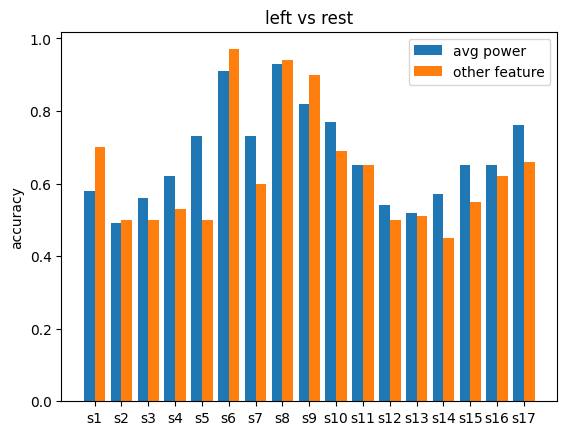

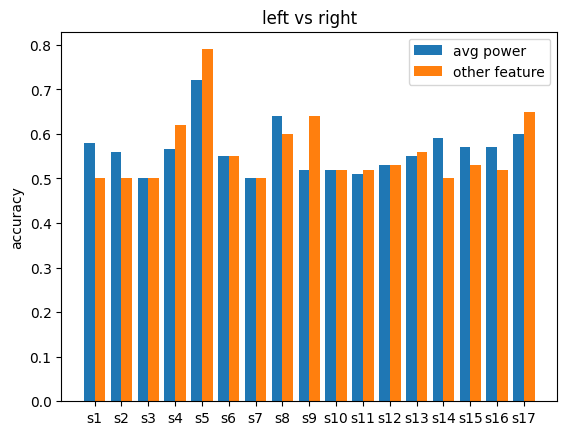

Global ERP response

In [2]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
left_rest_scores = []
epochs = []
i = 0
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        for file in os.listdir(dr):
            if 'ica_epo' in str(file) :
                if i == 0:
                    epochs = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    epochs = epochs.interpolate_bads()
                else :
                    new = read_epochs(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                    new = new.interpolate_bads()
                    epochs = concatenate_epochs([epochs,new])
                i+=1

Reading C:\Users\at18157\Desktop\bci\data\ah\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 55 sensor positions
Interpolating 9 sensors
Reading C:\Users\at18157\Desktop\bci\data\da\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
Not setting metadata
189 matching events found
No baseline correction applied
Reading C:\Users\at18157\Desktop\bci\

Not setting metadata
1463 matching events found
No baseline correction applied
Reading C:\Users\at18157\Desktop\bci\data\ysf\ica_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 7 sensors
Not setting metadata
1557 matching events found
No baseline correction applied


In [14]:
freqs = [7.,18.,35.,60.,90.,120.]
freq_ranges = list(zip(freqs[:-1], freqs[1:]))

from  7.0  to fmax 18.0


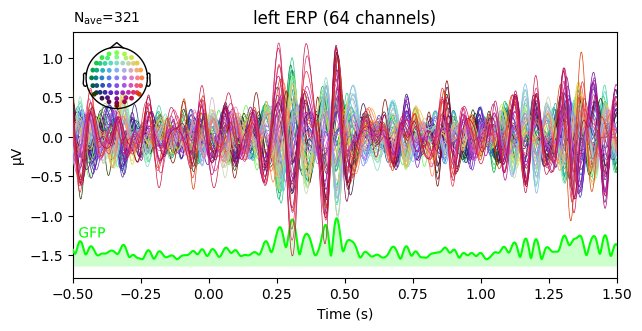

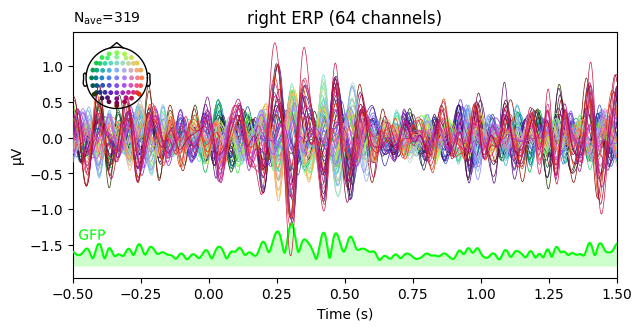

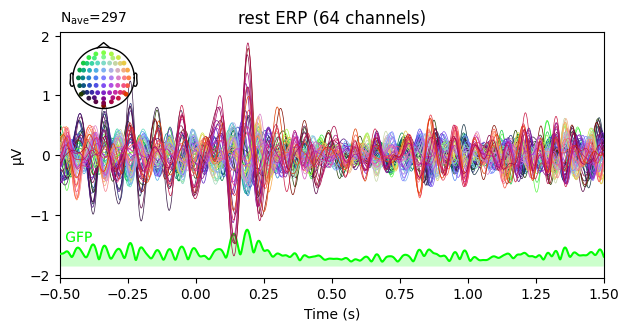

...
...




from  18.0  to fmax 35.0


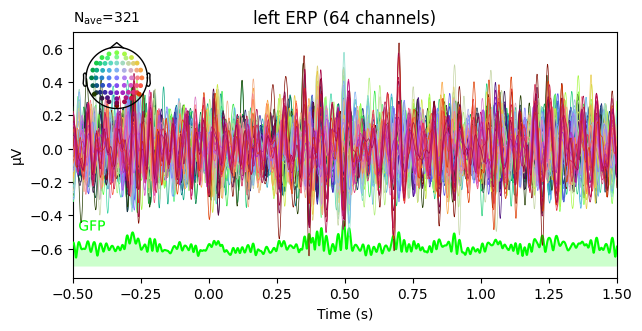

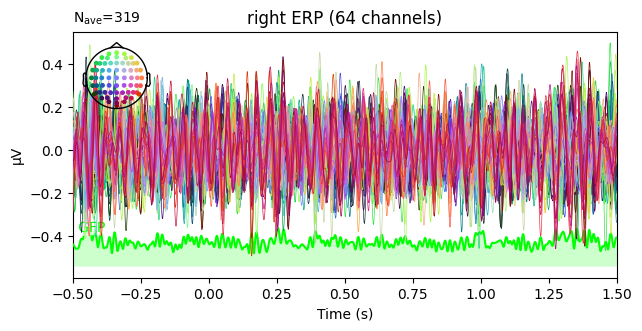

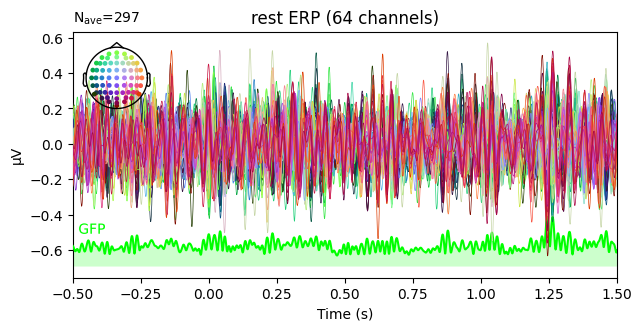

...
...




from  35.0  to fmax 60.0


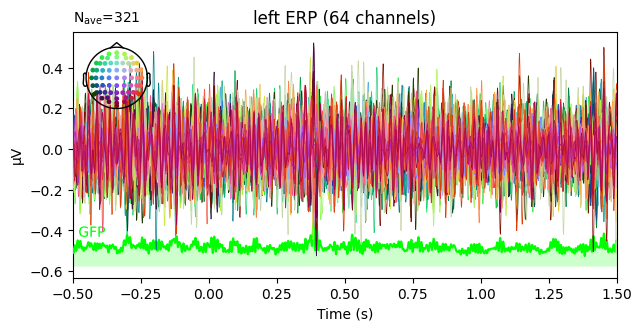

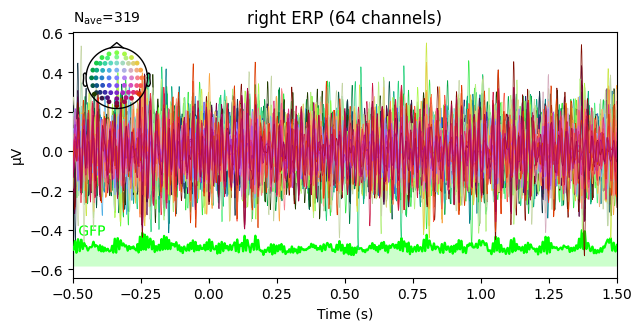

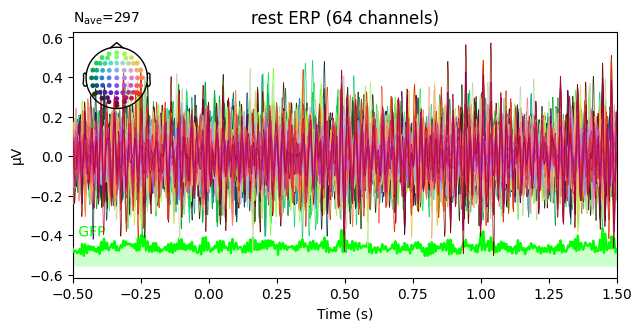

...
...




from  60.0  to fmax 90.0


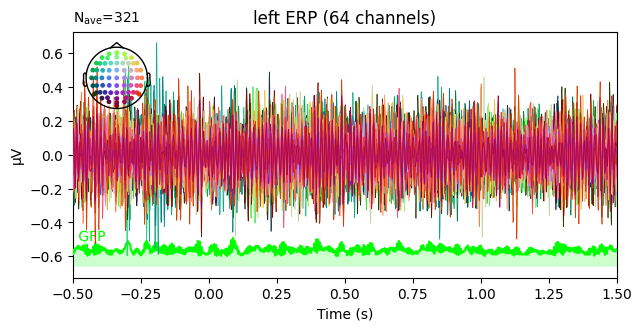

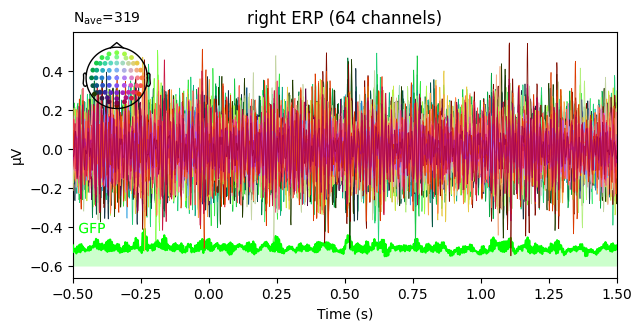

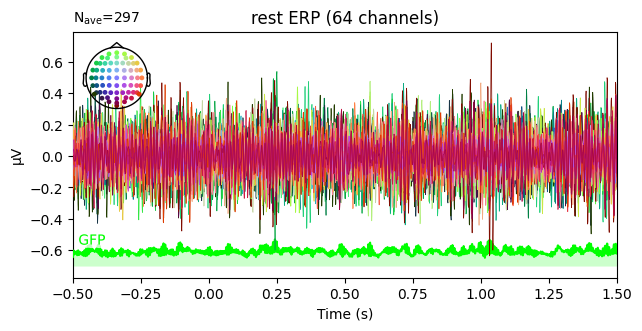

...
...




from  90.0  to fmax 120.0


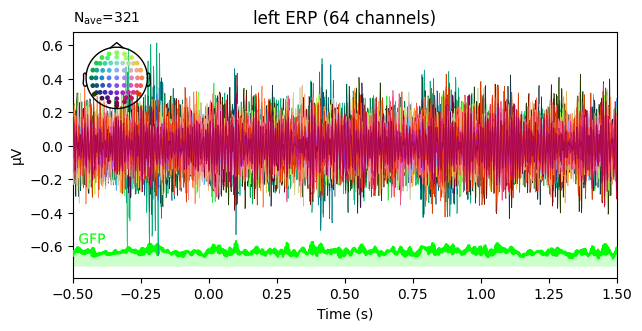

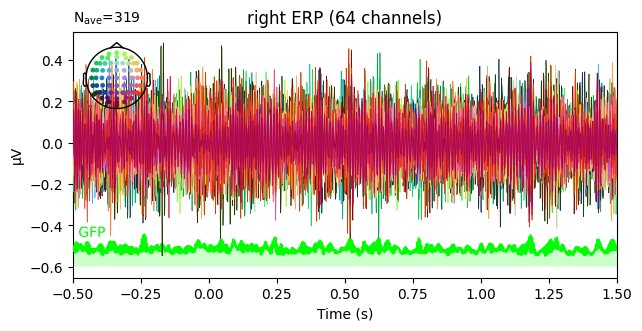

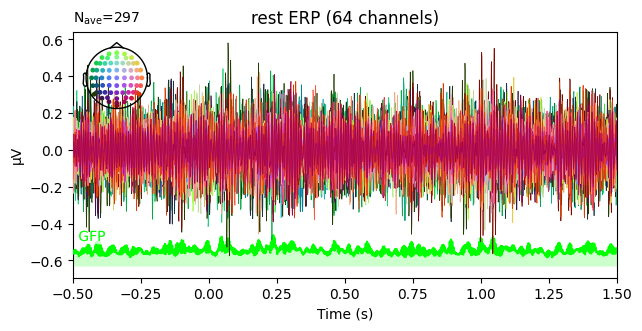

...
...






In [23]:
for freq, (fmin, fmax) in enumerate(freq_ranges):
    print('from ', fmin, ' to fmax', fmax)
    epochs['left'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='left ERP', gfp=True)
    epochs['right'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='right ERP', gfp=True)
    epochs['rest'].copy().filter(fmin, fmax, n_jobs=8).crop(-0.5, 1.5).average().plot(titles='rest ERP', gfp=True)
    print('...')
    print('...\n\n\n\n')    